In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix

In [2]:
df_train = pd.read_csv("../../data/titanic/train-data.csv")
df_test = pd.read_csv("../../data/titanic/test-data.csv")

In [3]:
df_train.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,28.500000,7.2292,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
1,1,27.000000,10.5000,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,1,29.699118,16.1000,0,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,0,29.699118,0.0000,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0,17.000000,8.6625,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [4]:
df_test.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,35.0,7.1250,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,20.0,7.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,26.0,7.8958,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,58.0,146.5208,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,1,35.0,83.4750,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    712 non-null    int64  
 1   Age         712 non-null    float64
 2   Fare        712 non-null    float64
 3   Pclass_1    712 non-null    int64  
 4   Pclass_2    712 non-null    int64  
 5   Pclass_3    712 non-null    int64  
 6   Sex_female  712 non-null    int64  
 7   Sex_male    712 non-null    int64  
 8   SibSp_0     712 non-null    int64  
 9   SibSp_1     712 non-null    int64  
 10  SibSp_2     712 non-null    int64  
 11  SibSp_3     712 non-null    int64  
 12  SibSp_4     712 non-null    int64  
 13  SibSp_5     712 non-null    int64  
 14  SibSp_8     712 non-null    int64  
 15  Parch_0     712 non-null    int64  
 16  Parch_1     712 non-null    int64  
 17  Parch_2     712 non-null    int64  
 18  Parch_3     712 non-null    int64  
 19  Parch_4     712 non-null    i

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    179 non-null    int64  
 1   Age         179 non-null    float64
 2   Fare        179 non-null    float64
 3   Pclass_1    179 non-null    int64  
 4   Pclass_2    179 non-null    int64  
 5   Pclass_3    179 non-null    int64  
 6   Sex_female  179 non-null    int64  
 7   Sex_male    179 non-null    int64  
 8   SibSp_0     179 non-null    int64  
 9   SibSp_1     179 non-null    int64  
 10  SibSp_2     179 non-null    int64  
 11  SibSp_3     179 non-null    int64  
 12  SibSp_4     179 non-null    int64  
 13  SibSp_5     179 non-null    int64  
 14  SibSp_8     179 non-null    int64  
 15  Parch_0     179 non-null    int64  
 16  Parch_1     179 non-null    int64  
 17  Parch_2     179 non-null    int64  
 18  Parch_3     179 non-null    int64  
 19  Parch_4     179 non-null    i

In [7]:
df_train.Survived.value_counts()

0    432
1    280
Name: Survived, dtype: int64

In [8]:
df_test.Survived.value_counts()

0    117
1     62
Name: Survived, dtype: int64

In [9]:
df_train.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [10]:
df_train.duplicated().sum()

78

In [11]:
df_train.drop_duplicates(inplace=True)

In [12]:
df_train.duplicated().sum()

0

In [13]:
df_train, df_val = train_test_split(df_train, test_size=0.2, stratify=df_train.Survived.values, random_state=41)

print(df_train.shape)
print(df_val.shape)

(507, 25)
(127, 25)


In [14]:
df_train.Survived.value_counts()

0    295
1    212
Name: Survived, dtype: int64

In [15]:
df_val.Survived.value_counts()

0    74
1    53
Name: Survived, dtype: int64

In [16]:
target_col = 'Survived'

In [17]:
X_train = df_train.drop(target_col, axis=1)
X_val = df_val.drop(target_col, axis=1)
X_test = df_test.drop(target_col, axis=1)

In [18]:
y_train = df_train.Survived.values
y_val = df_val.Survived.values
y_test = df_test.Survived.values

In [19]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/home/lenovo/miniconda3/envs/ml-practice-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)
y_test_pred = lr.predict(X_test)

In [21]:
print("Accuracy score (Training):", accuracy_score(y_train, y_train_pred))
print("Accuracy score (Validation):", accuracy_score(y_val, y_val_pred))
print("Accuracy score (Testing):", accuracy_score(y_test, y_test_pred))

Accuracy score (Training): 0.7712031558185405
Accuracy score (Validation): 0.8267716535433071
Accuracy score (Testing): 0.8156424581005587


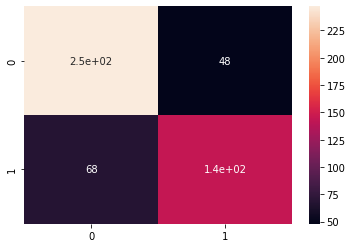

In [24]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True)
plt.show()